The following shows a map of cities connected by roads. The 25 cities are named 'A' to 'Y'. The list roadlist is a list of tuples of 2 cities. A pair of cities is in roadlist if there is a road connecting them.

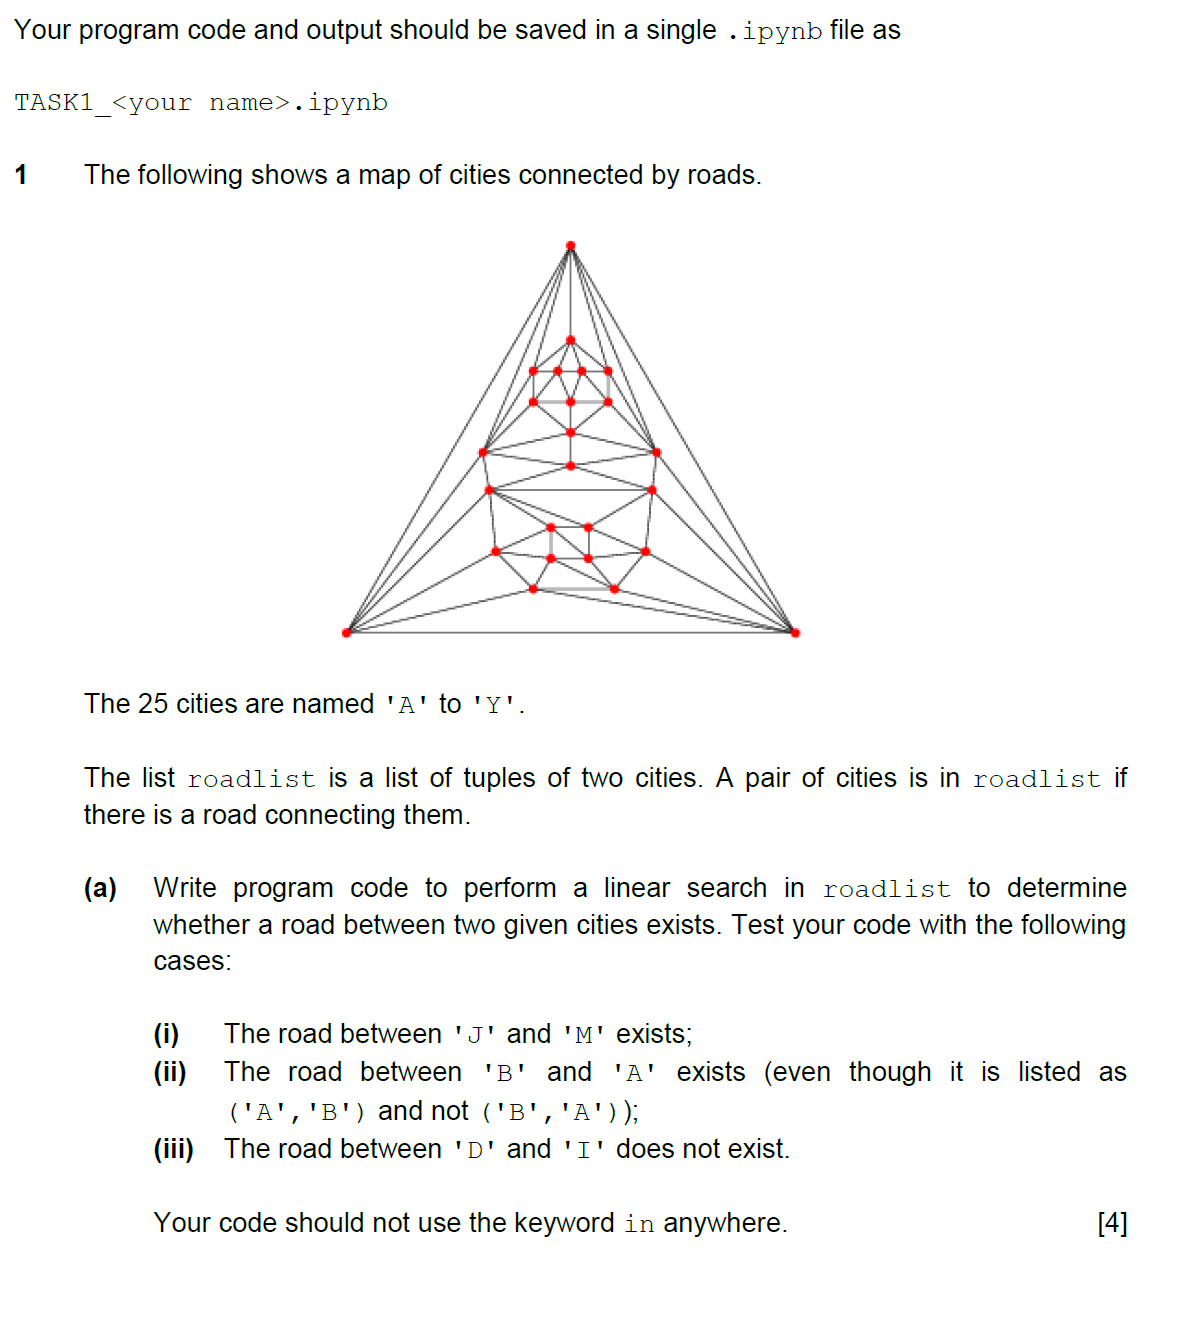

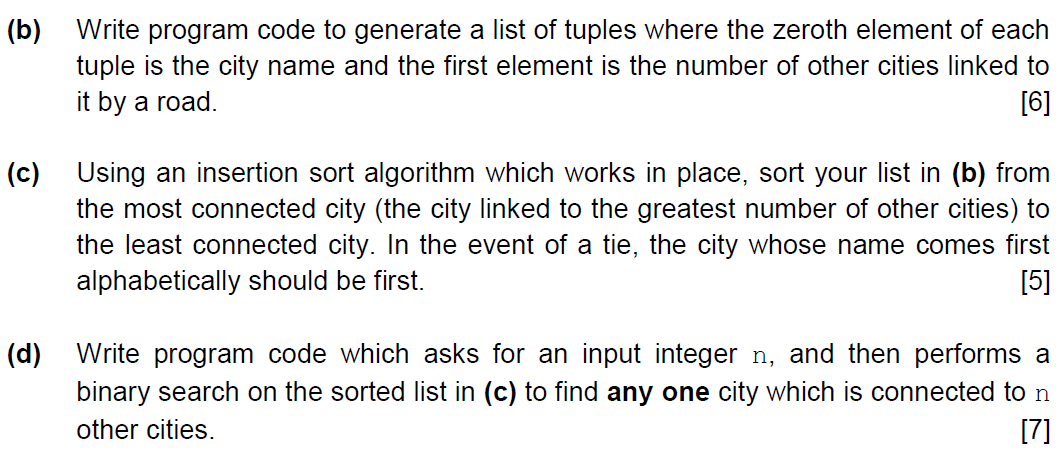

In [3]:
citylist = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

roadlist = [('A','B'),('A','C'),('A','F'),('A','K'),('A','L'),('A','X'),('A','Y'),
            ('B','C'),('B','D'),('B','E'),('B','F'),
            ('C','D'),('C','G'),('C','K'),
            ('D','E'),('D','G'),('D','H'),
            ('E','F'),('E','H'),('E','I'),
            ('F','I'),('F','L'),
            ('G','H'),('G','J'),('G','K'),
            ('H','I'),('H','J'),
            ('I','J'),('I','L'),
            ('J','K'),('J','L'),('J','M'),
            ('K','M'),('K','N'),('K','X'),
            ('L','M'),('L','O'),('L','Y'),
            ('M','N'),('M','O'),
            ('N','O'),('N','P'),('N','Q'),('N','R'),('N','X'),
            ('O','Q'),('O','S'),('O','Y'),
            ('P','Q'),('P','R'),('P','T'),('P','U'),
            ('Q','U'),('Q','S'),
            ('R','T'),('R','V'),('R','X'),
            ('S','U'),('S','W'),('S','Y'),
            ('T','U'),('T','V'),('T','W'),
            ('U','W'),
            ('V','W'),('V','X'),('V','Y'),
            ('W','Y'),
            ('X','Y')]

1(a) Write program code to perform a linear search in roadlist to determine whether a road between two given cities exists. Test your code with the following cases:

- The road between 'J' and 'M' exists
- The road between 'B' and 'A' exists (even though it is listed as ('A','B') and not ('B','A')
- The road between 'D' and 'I' does not exist

Your code should not use the word 'in' anywhere.

[4 marks]

In [4]:
def linear_search(a, b):
    for road in roadlist:
        if (a, b) == road or (b, a) == road:
            return True
    return False

In [5]:
linear_search('J', 'M')

True

In [6]:
linear_search('B', 'A')

True

In [7]:
linear_search('D', 'I')

False

1(b) Write program code to generate a list of tuples where the zeroth element of each tuple is the city name and the first element is the number of other cities linked to it by a road.

[6 marks]

In [6]:
def resolve_connections(city):
    city_roadlist = [list(i) for i in roadlist if i[0] == city or i[1] == city]
    for i in range(len(city_roadlist)):
        city_roadlist[i] = [i for i in city_roadlist[i] if i != city]
    city_roadlist = sum(city_roadlist, [])
    return (len(city_roadlist), city_roadlist)

def generate_tuples():
        return [(city,) + (resolve_connections(city)[0],) for city in citylist]

In [32]:
generate_tuples()

[('A', 7),
 ('B', 5),
 ('C', 5),
 ('D', 5),
 ('E', 5),
 ('F', 5),
 ('G', 5),
 ('H', 5),
 ('I', 5),
 ('J', 6),
 ('K', 7),
 ('L', 7),
 ('M', 5),
 ('N', 7),
 ('O', 6),
 ('P', 5),
 ('Q', 5),
 ('R', 5),
 ('S', 5),
 ('T', 5),
 ('U', 5),
 ('V', 5),
 ('W', 5),
 ('X', 6),
 ('Y', 7)]

1(c) Using a linear sort algorithm which works in place, sort your list in (b) from the most connected city (the city linked to the greatest number of other cities) to the least connected city. In the event of a tie, the city whose name comes first alphabetically should be first.

[5 marks]

In [9]:
def insertion_sort(A, mode=1):
    for i in range(len(A)):
        j = i
        while j > 0 and A[j - 1][1] < A[j][1]:
            A[j], A[j - 1] = A[j - 1], A[j]
            j = j - 1
    for i in range(len(A)):
        j = i
        while j > 0 and A[j - 1][1] == A[j][1] and A[j - 1][0] > A[j][0]:
            A[j], A[j - 1] = A[j - 1], A[j]
            j = j - 1

In [10]:
l = generate_tuples()
insertion_sort(l)
l

[('A', 7),
 ('K', 7),
 ('L', 7),
 ('N', 7),
 ('Y', 7),
 ('J', 6),
 ('O', 6),
 ('X', 6),
 ('B', 5),
 ('C', 5),
 ('D', 5),
 ('E', 5),
 ('F', 5),
 ('G', 5),
 ('H', 5),
 ('I', 5),
 ('M', 5),
 ('P', 5),
 ('Q', 5),
 ('R', 5),
 ('S', 5),
 ('T', 5),
 ('U', 5),
 ('V', 5),
 ('W', 5)]

1(d) Write program code which asks for an input integer n, and then performs a binary search on the sorted list in (c) to find ANY ONE city which is connected to n other cities.

[7 marks]

In [42]:
def part_d():
    n = int(input('Enter n (int)> '))
    l = generate_tuples()
    insertion_sort(l)
    up = len(l) - 1
    lb = 0
    while lb <= up:
        mid = (up + lb) // 2
        if n == l[mid][1]:
            return l[mid]
        elif n < l[mid][1]:
            lb = mid + 1
        else:
            up = mid - 1

In [44]:
part_d()

Enter n (int)>  5


('F', 5)

1(e) Modify your code from (d) to print a list of ALL cities which are connected to n other cities.

In [53]:
def part_e():
    n = int(input('Enter n (int)> '))
    l = generate_tuples()
    insertion_sort(l)
    up = len(l) - 1
    lb = 0
    while lb <= up:
        mid = (up + lb) // 2
        if n == l[mid][1]:
            tmp = [l[mid]]
            for i in range(mid + 1, len(l)):
                if l[i][1] != n:
                    break
                tmp.append(l[i])
            for i in range(0, mid):
                if l[i][1] != n:
                    break
                tmp.append(l[i])
            return tmp
        elif n < l[mid][1]:
            lb = mid + 1
        else:
            up = mid - 1

In [54]:
part_e()

Enter n (int)>  7


[('L', 7), ('N', 7), ('Y', 7), ('A', 7), ('K', 7)]

###### 